In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [502]:
data = pd.read_csv("test4.csv", parse_dates = ["time"], index_col = "time")
data

,Open,High,Low,Close
time,,,,
2023-08-22 12:00:00+00:00,1902.295,1903.455,1901.930,1902.225
2023-08-22 12:30:00+00:00,1902.215,1903.470,1899.165,1900.120
2023-08-22 13:00:00+00:00,1900.120,1901.405,1896.345,1897.460
2023-08-22 13:30:00+00:00,1897.415,1897.640,1894.030,1894.685
2023-08-22 14:00:00+00:00,1894.635,1894.790,1889.195,1890.510
...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710


In [503]:
start = "2024-06-20"
end = "2024-08-19"
symbol = "XAUUSD"
tc = 0.000059

In [504]:
ema_s=5
ema_l=20
rsi_s=7
rsi_l=14
rsi_l_threshold=50
rsi_s_threshold=50
donchian_length=5

In [505]:
data=data.copy().dropna()

In [506]:
data["returns"] = np.log(data.Close / data.Close.shift(1))

In [507]:
data

,Open,High,Low,Close,returns
time,,,,,
2023-08-22 12:00:00+00:00,1902.295,1903.455,1901.930,1902.225,NaN
2023-08-22 12:30:00+00:00,1902.215,1903.470,1899.165,1900.120,-0.001107
2023-08-22 13:00:00+00:00,1900.120,1901.405,1896.345,1897.460,-0.001401
2023-08-22 13:30:00+00:00,1897.415,1897.640,1894.030,1894.685,-0.001464
2023-08-22 14:00:00+00:00,1894.635,1894.790,1889.195,1890.510,-0.002206
...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804


In [508]:
data["EMA_S"] = data.Close.ewm(span = ema_s, min_periods = ema_s).mean()
data["EMA_L"] = data.Close.ewm(span = ema_l, min_periods = ema_l).mean()

In [509]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L
time,,,,,,,
2023-08-22 12:00:00+00:00,1902.295,1903.455,1901.930,1902.225,NaN,NaN,NaN
2023-08-22 12:30:00+00:00,1902.215,1903.470,1899.165,1900.120,-0.001107,NaN,NaN
2023-08-22 13:00:00+00:00,1900.120,1901.405,1896.345,1897.460,-0.001401,NaN,NaN
2023-08-22 13:30:00+00:00,1897.415,1897.640,1894.030,1894.685,-0.001464,NaN,NaN
2023-08-22 14:00:00+00:00,1894.635,1894.790,1889.195,1890.510,-0.002206,1894.745687,NaN
...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989


In [510]:
data=data.copy().dropna()

In [511]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L
time,,,,,,,
2023-08-22 22:30:00+00:00,1897.710,1898.280,1897.670,1898.280,0.000319,1897.704031,1897.164444
2023-08-22 23:00:00+00:00,1898.270,1898.275,1897.850,1897.990,-0.000153,1897.799373,1897.254018
2023-08-22 23:30:00+00:00,1897.995,1898.265,1897.810,1898.180,0.000100,1897.926266,1897.353173
2023-08-23 00:00:00+00:00,1898.185,1898.735,1898.180,1898.655,0.000250,1898.169199,1897.490943
2023-08-23 00:30:00+00:00,1898.710,1900.395,1898.496,1899.850,0.000629,1898.729499,1897.737981
...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989


In [512]:
data["U"] = np.where(data.Close.diff() > 0, data.Close.diff(), 0)
data["D"] = np.where(data.Close.diff() < 0, -data.Close.diff(), 0)
data["MA_U"] = data.U.rolling(rsi_s).mean()
data["MA_D"] = data.D.rolling(rsi_s).mean()
data["MA_U_l"] = data.U.rolling(rsi_l).mean()
data["MA_D_l"] = data.D.rolling(rsi_l).mean()
data["RSI_S"] = data.MA_U / (data.MA_U + data.MA_D) * 100
data["RSI_L"] = data.MA_U_l / (data.MA_U_l + data.MA_D_l) * 100
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,U,D,MA_U,MA_D,MA_U_l,MA_D_l,RSI_S,RSI_L
time,,,,,,,,,,,,,,,
2023-08-22 22:30:00+00:00,1897.710,1898.280,1897.670,1898.280,0.000319,1897.704031,1897.164444,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-22 23:00:00+00:00,1898.270,1898.275,1897.850,1897.990,-0.000153,1897.799373,1897.254018,0.000,0.290,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-22 23:30:00+00:00,1897.995,1898.265,1897.810,1898.180,0.000100,1897.926266,1897.353173,0.190,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-23 00:00:00+00:00,1898.185,1898.735,1898.180,1898.655,0.000250,1898.169199,1897.490943,0.475,0.000,NaN,NaN,NaN,NaN,NaN,NaN
2023-08-23 00:30:00+00:00,1898.710,1900.395,1898.496,1899.850,0.000629,1898.729499,1897.737981,1.195,0.000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,1.225,0.000,0.735000,1.694286,0.795714,1.436786,30.255807,35.642297
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,0.000,2.855,0.175000,2.102143,0.656429,1.640714,7.685069,28.575871
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,2.015,0.000,0.462857,1.435714,0.800357,1.214643,24.379233,39.719957


In [513]:
data=data.drop(columns=['U', 'D', 'MA_U', 'MA_D', "MA_U_l", "MA_D_l"])

In [514]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L
time,,,,,,,,,
2023-08-22 22:30:00+00:00,1897.710,1898.280,1897.670,1898.280,0.000319,1897.704031,1897.164444,NaN,NaN
2023-08-22 23:00:00+00:00,1898.270,1898.275,1897.850,1897.990,-0.000153,1897.799373,1897.254018,NaN,NaN
2023-08-22 23:30:00+00:00,1897.995,1898.265,1897.810,1898.180,0.000100,1897.926266,1897.353173,NaN,NaN
2023-08-23 00:00:00+00:00,1898.185,1898.735,1898.180,1898.655,0.000250,1898.169199,1897.490943,NaN,NaN
2023-08-23 00:30:00+00:00,1898.710,1900.395,1898.496,1899.850,0.000629,1898.729499,1897.737981,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957


In [515]:
data=data.copy().dropna()

In [516]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L
time,,,,,,,,,
2023-08-23 05:00:00+00:00,1901.265,1903.435,1901.035,1903.360,0.001099,1901.859050,1900.017408,67.617108,74.376200
2023-08-23 05:30:00+00:00,1903.390,1903.760,1902.430,1902.925,-0.000229,1902.214367,1900.303854,61.720227,71.395670
2023-08-23 06:00:00+00:00,1902.940,1904.020,1902.625,1902.665,-0.000137,1902.364578,1900.535706,67.043121,71.593533
2023-08-23 06:30:00+00:00,1902.640,1904.555,1902.285,1904.060,0.000733,1902.929719,1900.880752,74.112903,74.438903
2023-08-23 07:00:00+00:00,1904.035,1904.780,1902.685,1902.950,-0.000583,1902.936479,1901.082804,67.424798,66.956178
...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957


In [517]:
data['Donchian_Upper'] = data['High'].rolling(window=donchian_length).max()
data['Donchian_Lower'] = data['Low'].rolling(window=donchian_length).min()
data['Donchian_Mid'] = (data['Donchian_Upper'] + data['Donchian_Lower']) / 2

In [518]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L,Donchian_Upper,Donchian_Lower,Donchian_Mid
time,,,,,,,,,,,,
2023-08-23 05:00:00+00:00,1901.265,1903.435,1901.035,1903.360,0.001099,1901.859050,1900.017408,67.617108,74.376200,NaN,NaN,NaN
2023-08-23 05:30:00+00:00,1903.390,1903.760,1902.430,1902.925,-0.000229,1902.214367,1900.303854,61.720227,71.395670,NaN,NaN,NaN
2023-08-23 06:00:00+00:00,1902.940,1904.020,1902.625,1902.665,-0.000137,1902.364578,1900.535706,67.043121,71.593533,NaN,NaN,NaN
2023-08-23 06:30:00+00:00,1902.640,1904.555,1902.285,1904.060,0.000733,1902.929719,1900.880752,74.112903,74.438903,NaN,NaN,NaN
2023-08-23 07:00:00+00:00,1904.035,1904.780,1902.685,1902.950,-0.000583,1902.936479,1901.082804,67.424798,66.956178,1904.780,1901.035,1902.9075
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297,2517.110,2505.245,2511.1775
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871,2514.185,2504.595,2509.3900
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957,2512.470,2504.515,2508.4925


In [519]:
data=data.copy().dropna()

In [520]:
data["position"] = np.where((data["EMA_S"] > data["EMA_L"]) &\
                            (data['RSI_S'] > rsi_l_threshold) &\
                            (data['RSI_L'] > rsi_l_threshold) &\
                            (data['Close'] > data['Donchian_Mid']),
                            1, np.nan)

In [521]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L,Donchian_Upper,Donchian_Lower,Donchian_Mid,position
time,,,,,,,,,,,,,
2023-08-23 07:00:00+00:00,1904.035,1904.780,1902.685,1902.950,-0.000583,1902.936479,1901.082804,67.424798,66.956178,1904.780,1901.035,1902.9075,1.0
2023-08-23 07:30:00+00:00,1902.930,1904.340,1902.545,1904.095,0.000602,1903.322653,1901.376223,67.591241,66.825208,1904.780,1902.285,1903.5325,1.0
2023-08-23 08:00:00+00:00,1904.110,1904.450,1901.785,1903.695,-0.000210,1903.446769,1901.601606,67.739576,68.957055,1904.780,1901.785,1903.2825,1.0
2023-08-23 08:30:00+00:00,1903.645,1905.115,1903.575,1904.020,0.000171,1903.637846,1901.836212,56.508876,61.973948,1905.115,1901.785,1903.4500,1.0
2023-08-23 09:00:00+00:00,1904.030,1905.525,1903.545,1903.815,-0.000108,1903.696897,1902.027833,59.194215,60.513327,1905.525,1901.785,1903.6550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297,2517.110,2505.245,2511.1775,NaN
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871,2514.185,2504.595,2509.3900,NaN
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957,2512.470,2504.515,2508.4925,NaN


In [522]:
data["position"] = np.where((data["EMA_S"] < data["EMA_L"]) &\
                            (data['RSI_S'] < rsi_s_threshold) &\
                            (data['RSI_L'] < rsi_s_threshold) &\
                            (data['Close'] < data['Donchian_Mid']),
                            -1,data['position'])

In [523]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L,Donchian_Upper,Donchian_Lower,Donchian_Mid,position
time,,,,,,,,,,,,,
2023-08-23 07:00:00+00:00,1904.035,1904.780,1902.685,1902.950,-0.000583,1902.936479,1901.082804,67.424798,66.956178,1904.780,1901.035,1902.9075,1.0
2023-08-23 07:30:00+00:00,1902.930,1904.340,1902.545,1904.095,0.000602,1903.322653,1901.376223,67.591241,66.825208,1904.780,1902.285,1903.5325,1.0
2023-08-23 08:00:00+00:00,1904.110,1904.450,1901.785,1903.695,-0.000210,1903.446769,1901.601606,67.739576,68.957055,1904.780,1901.785,1903.2825,1.0
2023-08-23 08:30:00+00:00,1903.645,1905.115,1903.575,1904.020,0.000171,1903.637846,1901.836212,56.508876,61.973948,1905.115,1901.785,1903.4500,1.0
2023-08-23 09:00:00+00:00,1904.030,1905.525,1903.545,1903.815,-0.000108,1903.696897,1902.027833,59.194215,60.513327,1905.525,1901.785,1903.6550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297,2517.110,2505.245,2511.1775,-1.0
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871,2514.185,2504.595,2509.3900,-1.0
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957,2512.470,2504.515,2508.4925,-1.0


In [524]:
data['position'].value_counts()

position
 1.0    3356
-1.0    2685
Name: count, dtype: int64

In [525]:
data['position'].fillna(0,inplace=True)

C:\Users\Chia W Y\AppData\Local\Temp\ipykernel_15708\1428499520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['position'].fillna(0,inplace=True)


In [526]:
data['position'].value_counts()

position
 0.0    5745
 1.0    3356
-1.0    2685
Name: count, dtype: int64

In [527]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L,Donchian_Upper,Donchian_Lower,Donchian_Mid,position
time,,,,,,,,,,,,,
2023-08-23 07:00:00+00:00,1904.035,1904.780,1902.685,1902.950,-0.000583,1902.936479,1901.082804,67.424798,66.956178,1904.780,1901.035,1902.9075,1.0
2023-08-23 07:30:00+00:00,1902.930,1904.340,1902.545,1904.095,0.000602,1903.322653,1901.376223,67.591241,66.825208,1904.780,1902.285,1903.5325,1.0
2023-08-23 08:00:00+00:00,1904.110,1904.450,1901.785,1903.695,-0.000210,1903.446769,1901.601606,67.739576,68.957055,1904.780,1901.785,1903.2825,1.0
2023-08-23 08:30:00+00:00,1903.645,1905.115,1903.575,1904.020,0.000171,1903.637846,1901.836212,56.508876,61.973948,1905.115,1901.785,1903.4500,1.0
2023-08-23 09:00:00+00:00,1904.030,1905.525,1903.545,1903.815,-0.000108,1903.696897,1902.027833,59.194215,60.513327,1905.525,1901.785,1903.6550,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297,2517.110,2505.245,2511.1775,-1.0
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871,2514.185,2504.595,2509.3900,-1.0
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957,2512.470,2504.515,2508.4925,-1.0


In [528]:
data['Time_Filter'] = ((data.index.hour >= 7) & (data.index.hour <= 11)) | ((data.index.hour >= 13) & (data.index.hour <= 17))

In [529]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L,Donchian_Upper,Donchian_Lower,Donchian_Mid,position,Time_Filter
time,,,,,,,,,,,,,,
2023-08-23 07:00:00+00:00,1904.035,1904.780,1902.685,1902.950,-0.000583,1902.936479,1901.082804,67.424798,66.956178,1904.780,1901.035,1902.9075,1.0,True
2023-08-23 07:30:00+00:00,1902.930,1904.340,1902.545,1904.095,0.000602,1903.322653,1901.376223,67.591241,66.825208,1904.780,1902.285,1903.5325,1.0,True
2023-08-23 08:00:00+00:00,1904.110,1904.450,1901.785,1903.695,-0.000210,1903.446769,1901.601606,67.739576,68.957055,1904.780,1901.785,1903.2825,1.0,True
2023-08-23 08:30:00+00:00,1903.645,1905.115,1903.575,1904.020,0.000171,1903.637846,1901.836212,56.508876,61.973948,1905.115,1901.785,1903.4500,1.0,True
2023-08-23 09:00:00+00:00,1904.030,1905.525,1903.545,1903.815,-0.000108,1903.696897,1902.027833,59.194215,60.513327,1905.525,1901.785,1903.6550,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297,2517.110,2505.245,2511.1775,-1.0,True
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871,2514.185,2504.595,2509.3900,-1.0,True
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957,2512.470,2504.515,2508.4925,-1.0,True


In [530]:
data.position = np.where(data['Time_Filter'], data.position, 0)

In [531]:
data

,Open,High,Low,Close,returns,EMA_S,EMA_L,RSI_S,RSI_L,Donchian_Upper,Donchian_Lower,Donchian_Mid,position,Time_Filter
time,,,,,,,,,,,,,,
2023-08-23 07:00:00+00:00,1904.035,1904.780,1902.685,1902.950,-0.000583,1902.936479,1901.082804,67.424798,66.956178,1904.780,1901.035,1902.9075,1.0,True
2023-08-23 07:30:00+00:00,1902.930,1904.340,1902.545,1904.095,0.000602,1903.322653,1901.376223,67.591241,66.825208,1904.780,1902.285,1903.5325,1.0,True
2023-08-23 08:00:00+00:00,1904.110,1904.450,1901.785,1903.695,-0.000210,1903.446769,1901.601606,67.739576,68.957055,1904.780,1901.785,1903.2825,1.0,True
2023-08-23 08:30:00+00:00,1903.645,1905.115,1903.575,1904.020,0.000171,1903.637846,1901.836212,56.508876,61.973948,1905.115,1901.785,1903.4500,1.0,True
2023-08-23 09:00:00+00:00,1904.030,1905.525,1903.545,1903.815,-0.000108,1903.696897,1902.027833,59.194215,60.513327,1905.525,1901.785,1903.6550,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 09:30:00+00:00,2507.235,2509.275,2505.245,2508.550,0.000488,2509.898333,2513.353354,30.255807,35.642297,2517.110,2505.245,2511.1775,-1.0,True
2024-08-21 10:00:00+00:00,2508.515,2508.970,2504.595,2505.695,-0.001139,2508.497222,2512.623987,7.685069,28.575871,2514.185,2504.595,2509.3900,-1.0,True
2024-08-21 10:30:00+00:00,2505.625,2507.960,2504.515,2507.710,0.000804,2508.234815,2512.155989,24.379233,39.719957,2512.470,2504.515,2508.4925,-1.0,True


In [532]:
data["strategy"] = data["position"].shift(1) * data["returns"]
data.dropna(inplace=True)

# determine when a trade takes place
data["trades"] = data.position.diff().fillna(0).abs()

# subtract transaction costs from return when trade takes place
data.strategy = data.strategy - data.trades * tc

data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

# absolute performance of the strategy
perf = data["cstrategy"].iloc[-1]
# out-/underperformance of strategy
outperf = perf - data["creturns"].iloc[-1]
print(round(perf, 6), round(outperf, 6))

1.07983 -0.238647


<Axes: title={'center': 'XAU_USD'}, xlabel='time'>

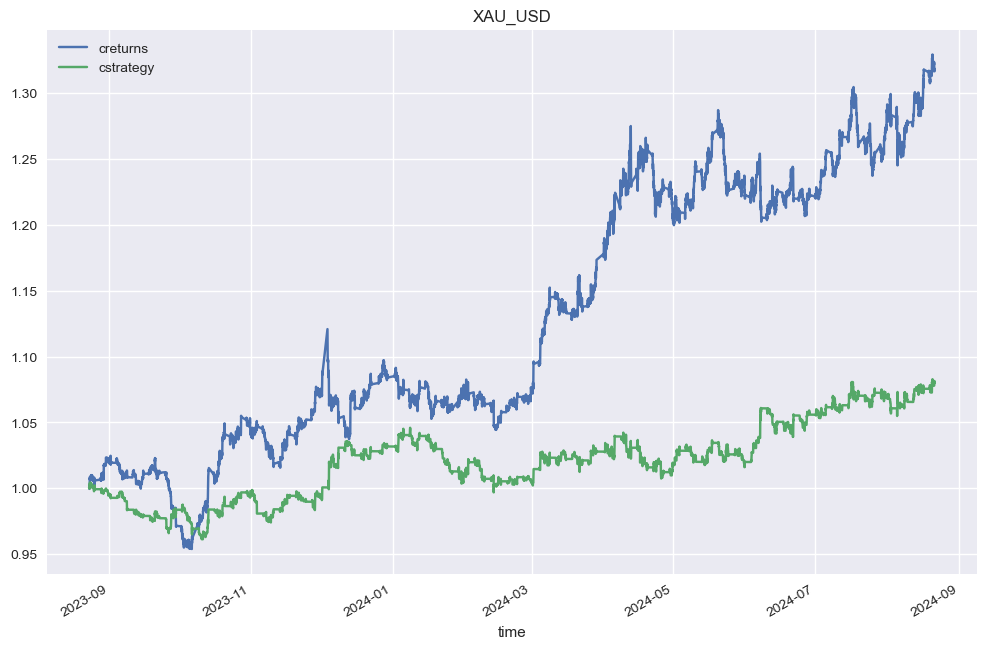

In [533]:
data[["creturns", "cstrategy"]].plot(title="XAU_USD", figsize=(12, 8))

Final Performance: 2.381656
Out-/Underperformance: 0.948502


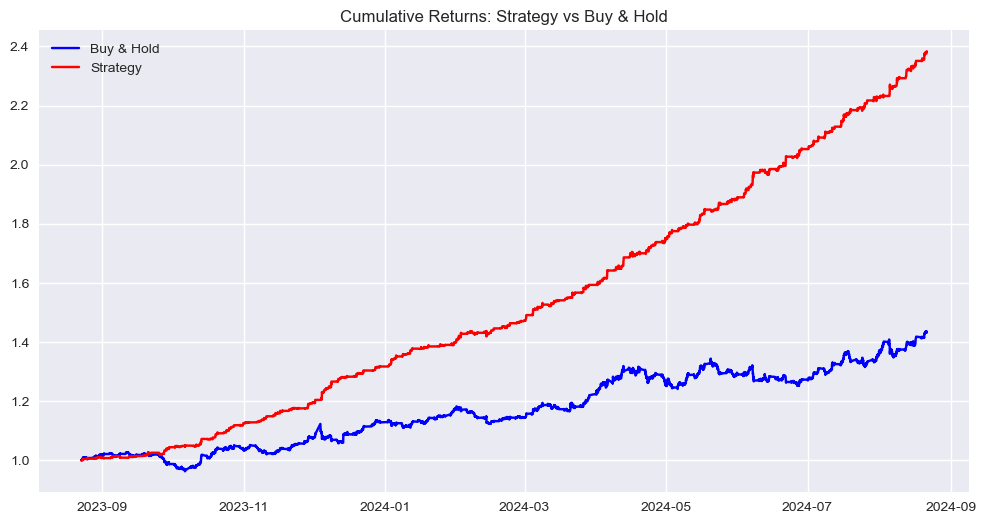

In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

# Load the data
data = pd.read_csv("test4.csv", parse_dates=["time"], index_col="time")

# Strategy Parameters
start = "2024-06-20"
end = "2024-08-19"
symbol = "XAUUSD"
tc = 0.000059  # transaction cost

ema_s = 5
ema_l = 20
rsi_s = 7
rsi_l = 14
rsi_l_threshold = 50
rsi_s_threshold = 50
donchian_length = 5
atr_length = 14
atr_multiplier = 1.0
take_profit_multiplier = 2.0

# Indicator Calculations
data["returns"] = np.log(data.Close / data.Close.shift(1))
data["EMA_S"] = data.Close.ewm(span=ema_s, min_periods=ema_s).mean()
data["EMA_L"] = data.Close.ewm(span=ema_l, min_periods=ema_l).mean()

data["U"] = np.where(data.Close.diff() > 0, data.Close.diff(), 0)
data["D"] = np.where(data.Close.diff() < 0, -data.Close.diff(), 0)
data["MA_U"] = data.U.rolling(rsi_s).mean()
data["MA_D"] = data.D.rolling(rsi_s).mean()
data["MA_U_l"] = data.U.rolling(rsi_l).mean()
data["MA_D_l"] = data.D.rolling(rsi_l).mean()
data["RSI_S"] = data.MA_U / (data.MA_U + data.MA_D) * 100
data["RSI_L"] = data.MA_U_l / (data.MA_U_l + data.MA_D_l) * 100

data['Donchian_Upper'] = data['High'].rolling(window=donchian_length).max()
data['Donchian_Lower'] = data['Low'].rolling(window=donchian_length).min()
data['Donchian_Mid'] = (data['Donchian_Upper'] + data['Donchian_Lower']) / 2

# ATR Calculation
data['ATR'] = data['High'].rolling(window=atr_length).max() - data['Low'].rolling(window=atr_length).min()

# Stop-Loss and Take-Profit Levels
data['stop_loss_long'] = data['Close'] - data['ATR'] * atr_multiplier
data['take_profit_long'] = data['Close'] + data['ATR'] * take_profit_multiplier
data['stop_loss_short'] = data['Close'] + data['ATR'] * atr_multiplier
data['take_profit_short'] = data['Close'] - data['ATR'] * take_profit_multiplier

# Position Determination
data["position"] = np.where((data["EMA_S"] > data["EMA_L"]) &
                            (data['RSI_S'] > rsi_l_threshold) &
                            (data['RSI_L'] > rsi_l_threshold) &
                            (data['Close'] > data['Donchian_Mid']),
                            1, np.nan)

data["position"] = np.where((data["EMA_S"] < data["EMA_L"]) &
                            (data['RSI_S'] < rsi_s_threshold) &
                            (data['RSI_L'] < rsi_s_threshold) &
                            (data['Close'] < data['Donchian_Mid']),
                            -1, data['position'])

# Time-Based Filtering
data['Time_Filter'] = ((data.index.hour >= 7) & (data.index.hour <= 11)) | ((data.index.hour >= 13) & (data.index.hour <= 17))
data['position'] = np.where(data['Time_Filter'], data['position'], 0)

# Apply stop-loss and take-profit conditions
data["position"] = np.where((data["position"] == 1) &
                            ((data["Low"] <= data['stop_loss_long']) |
                             (data["High"] >= data['take_profit_long'])),
                            0, data["position"])

data["position"] = np.where((data["position"] == -1) &
                            ((data["High"] >= data['stop_loss_short']) |
                             (data["Low"] <= data['take_profit_short'])),
                            0, data["position"])

# Strategy Performance Calculation
data["strategy"] = data["position"].shift(1) * data["returns"]
data.dropna(inplace=True)

# Determine when a trade takes place
data["trades"] = data.position.diff().fillna(0).abs()

# Subtract transaction costs from return when trade takes place
data.strategy = data.strategy - data.trades * tc

# Cumulative Returns
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

# Absolute performance of the strategy
perf = data["cstrategy"].iloc[-1]
# Out-/underperformance of strategy
outperf = perf - data["creturns"].iloc[-1]
print(f'Final Performance: {round(perf, 6)}')
print(f'Out-/Underperformance: {round(outperf, 6)}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['creturns'], label='Buy & Hold', color='blue')
plt.plot(data['cstrategy'], label='Strategy', color='red')
plt.title('Cumulative Returns: Strategy vs Buy & Hold')
plt.legend()
plt.show()


Max Drawdown: 1.81%


<Axes: xlabel='time'>

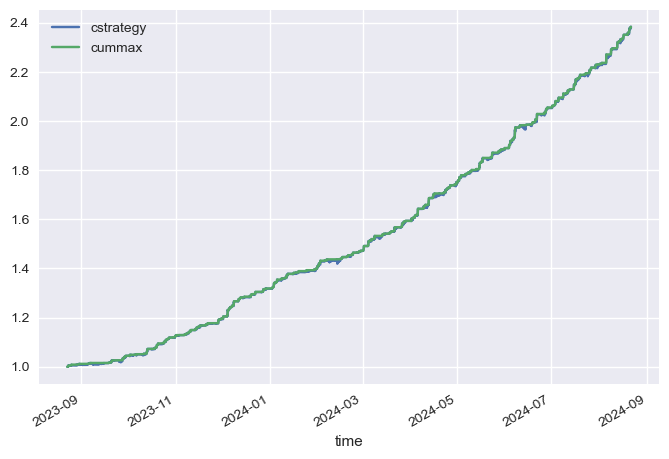

In [596]:
# Calculate the running maximum of the cumulative strategy returns
data["cummax"] = data["cstrategy"].cummax()

# Calculate drawdown considering high and low prices
data["drawdown"] = data["cummax"] - data["cstrategy"]


max_drawdown = data["drawdown"].max()

print(f'Max Drawdown: {max_drawdown * 100:.2f}%')

# Plot the drawdown
data[['cstrategy','cummax']].plot()